In [1]:
pip install conda

In [2]:
pip install pysoundfile

In [3]:
import librosa    #Python Library for analysing audio
import soundfile
import os, glob, pickle
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as functional
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
import os.path
import pdb

#%%
#%%
# --------------------------------------------------------------------------------------------- #
                                        # Data Section
                        # Prepare all the data for training and prediction
# --------------------------------------------------------------------------------------------- #


# -------------------------------------------- #
            # Generate training set
# -------------------------------------------- #
AUDIO_EXTENSIONS = [
    '.wav', '.WAV',
]

def is_audio_file(filename):
    return any(filename.endswith(extension) for extension in AUDIO_EXTENSIONS)

def find_classes(dir):
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx

def make_dataset(dir, class_to_idx):
    spects = []
    dir = os.path.expanduser(dir)
    for target in sorted(os.listdir(dir)):
        d = os.path.join(dir, target)
        if not os.path.isdir(d):
            continue

        for root, _, fnames in sorted(os.walk(d)):
            for fname in sorted(fnames):
                if is_audio_file(fname):
                    path = os.path.join(root, fname)
                    item = (path, class_to_idx[target])
                    spects.append(item)
    return spects

In [5]:
def extract_features(file_name, mfcc, chroma, mel, contrast,tonnetz):   
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype = "float32")
        sample_rate = sound_file.samplerate
 
        if chroma:
            stft = np.abs(librosa.stft(X))
            result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y = X, sr = sample_rate, n_mfcc = 40).T, axis = 0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis = 0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr = sample_rate).T, axis = 0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    
    return result

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Get the directories which represent the classes
# dirPath = "/content/drive/My Drive/4"
# classes,class_to_idx = find_classes(dirPath)

# spects = make_dataset(dirPath,class_to_idx)
# print(spects)

In [8]:
from sklearn.model_selection import train_test_split
import csv


def load_data(test_size=0.2):
    X, y = [], []
#   # if csv :#:
#     for file in spects:
#         file_name = file[0]
#         emotion = file[1]
#         feature=extract_features(file_name, mfcc = True, chroma = True, mel = True, contrast= True ,tonnetz= True)
#         X.append(feature)
#         y.append(emotion)

    #:
 
    with open('/content/drive/My Drive/final project/f_anger+happy.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
       for row in csvReader:
         X.append(row)

    with open('/content/drive/My Drive/final project/labels_anger+happy.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile)
       for row in csvReader:
         y.append(row)
    
    with open('/content/drive/My Drive/final project/f_sad.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
       for row in csvReader:
         X.append(row)

    with open('/content/drive/My Drive/final project/labels_sad.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile)
       for row in csvReader:
         y.append(row)
    
    with open('/content/drive/My Drive/final project/f_neutral.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
       for row in csvReader:
         X.append(row)

    with open('/content/drive/My Drive/final project/labels_neutral.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile)
       for row in csvReader:
         y.append(row)

    with open('/content/drive/My Drive/final project/f_fear.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
       for row in csvReader:
         X.append(row)

    with open('/content/drive/My Drive/final project/labels_fear.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile)
       for row in csvReader:
         y.append(row)
         
    with open('/content/drive/My Drive/final project/f_disgust.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
       for row in csvReader:
         X.append(row)

    with open('/content/drive/My Drive/final project/labels_disgust.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile)
       for row in csvReader:
         y.append(row)


    
    return train_test_split(np.array(X), y, test_size = test_size, random_state = 9)

In [9]:
X_train, X_test, y_train, y_test = load_data(test_size = 0.25)


In [10]:
# import pandas as pd
# f = pd.DataFrame(np.array(X))
# labels = pd.DataFrame(y)

In [11]:
# import pandas as pd
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [12]:
# f.to_csv('f_happy.csv')
# uploaded = drive.CreateFile({'title': 'f_happy.csv'})
# uploaded.SetContentFile('f_happy.csv')
# uploaded.Upload()

# labels.to_csv('labels_happy.csv')
# uploaded = drive.CreateFile({'title': 'labels_happy.csv'})
# uploaded.SetContentFile('labels_happy.csv')
# uploaded.Upload()

In [13]:
# print(X_train.shape)
# print(X_train)
# print(X_test.shape)
# print(len(y_train))


In [14]:
print(f'Features extracted: {X_train.shape[1]}')

Features extracted: 193


In [15]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), 
                    learning_rate='adaptive', max_iter = 500)

In [16]:
classifier.fit(X_train,np.ravel(y_train))

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [17]:
y_pred=classifier.predict(X_test)

In [18]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_pred.shape)
# print(y_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)

In [20]:
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 61.62%


In [21]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

In [22]:
classes = ('anger', 'happy', 'neutral', 'sad','fear','disgust')

target_names = classes
print(classification_report(y_test, y_pred, target_names=target_names))



              precision    recall  f1-score   support

       anger       0.72      0.72      0.72       438
       happy       0.57      0.59      0.58       442
     neutral       0.50      0.60      0.54       380
         sad       0.66      0.51      0.57       439
        fear       0.63      0.63      0.63       376
     disgust       0.65      0.65      0.65       421

    accuracy                           0.62      2496
   macro avg       0.62      0.62      0.62      2496
weighted avg       0.62      0.62      0.62      2496



[[317  56   6   2  23  34]
 [ 65 223  29  18  58  46]
 [  7  12 238  50  27  42]
 [  0   3  36 272  70  40]
 [ 27  28  16  43 228  38]
 [ 25  15  55  36  51 260]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


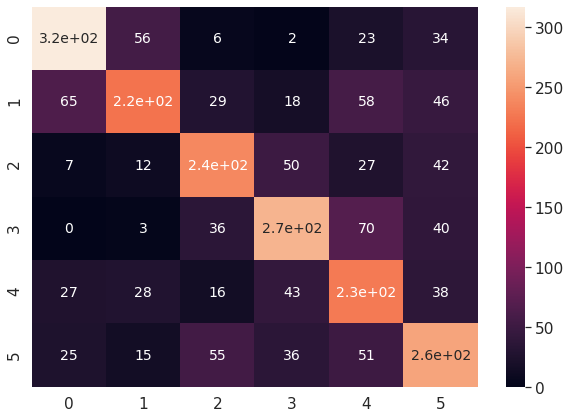

In [23]:

# Plot non-normalized confusion matrix
import seaborn as sn
import pandas as pd
from pandas.testing import assert_frame_equal

#!pip install matplotlib==3.1.0 # Solves the confusion matrix gets cut
cm = confusion_matrix(y_test, y_pred, labels=["anger", "happy", "neutral", "sad","fear","disgust"])
print(cm)
df_cm = pd.DataFrame(cm, range(len(cm)),
                  range(len(cm)))

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14})# font size

plt.show()

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
feature=extract_features("/content/drive/My Drive/try/dana.wav", mfcc = True, chroma = True, mel = True, contrast= True ,tonnetz= True)

In [26]:
v =[]
v.append(feature)

In [27]:
y_pred=classifier.predict(v)
result=classifier.predict_proba(v)

In [28]:
print(y_pred)
print('Probability: ', result)
#print(class_to_idx['anger'])
print(classifier.classes_)



['happy']
Probability:  [[6.46898699e-05 1.41100279e-03 2.11675436e-04 9.98312297e-01
  4.43462405e-09 3.30582368e-07]]
['anger' 'disgust' 'fear' 'happy' 'neutral' 'sad']


In [29]:
import torch
torch.save(classifier,"/content/drive/My Drive/final project/saveModel/model1")